<font color='darkblue'>

# Data Analysis Interview Challenge (I)
    
## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them. 
    
<font/>

In [1]:
import json

# Creates path for file
data_path = './data/logins.json'

# Opens jason file in read mode and load it in json_data variable
with open(data_path, 'r') as json_file:
    json_data = json.load(json_file)

In [2]:
type(json_data)

dict

In [3]:
json_data.keys()

dict_keys(['login_time'])

In [4]:
import pandas as pd

df_logins = pd.DataFrame(json_data, )
df_logins.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [6]:
df_logins['count'] = 1

In [7]:
df_logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [8]:
df_logins = df_logins.set_index('login_time')

In [9]:
df_logins.index = pd.to_datetime(df_logins.index)

In [10]:
df_logins.head(5)

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [11]:
df_agg = df_logins.resample('15min').count()

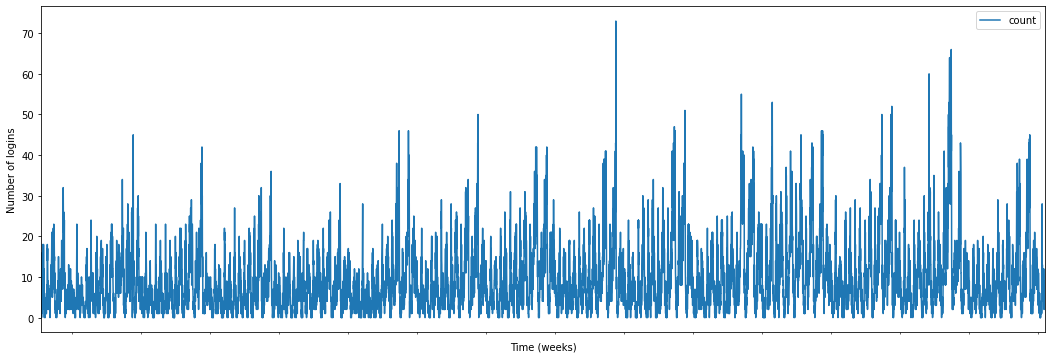

In [12]:
import matplotlib.pyplot as plt

df_agg.plot(figsize=(18,6))
plt.ylabel('Number of logins')
plt.xlabel('Time (weeks)')
plt.xticks(range(0, df_agg.shape[1], 96))
plt.show()

At fist sight we can see that this is not a stationary time series because:
- The demand is cyclical, it seems that there is some weekly seasonality.
- The variance is not constant over time.
- We can see a slight upward trend, meaning that the mean also changes over time.

Let's investigate further the weekly pattern seen in previous graph

In [13]:
df_weekly_agg = df_logins.resample('D').count()
df_weekly_agg['day'] = df_weekly_agg.index.dayofweek

avg_week = df_weekly_agg.groupby(by='day').mean()

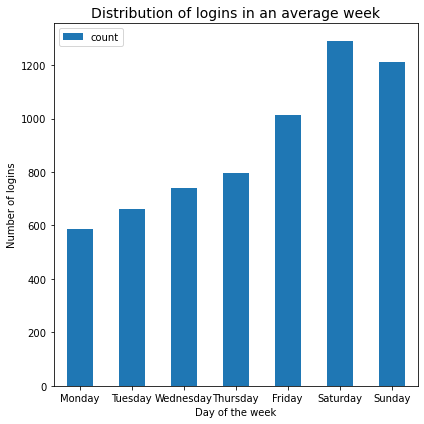

In [14]:
# Plots the result

avg_week.plot(kind='bar', figsize=(6,6))
plt.title('Distribution of logins in an average week', fontsize=14)
plt.ylabel('Number of logins')
plt.xlabel('Day of the week')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.tight_layout()
plt.show()

We can see an increasing demand towards the weekend, with a peak on Saturday.

Moreover, I will inspect login counts in 15 min period over a single average day to inspect the daily patterns:

In [15]:
# Creates two new columns extraction hour of the day and minute of the hour
df_agg['hour'] = df_agg.index.hour
df_agg['minute'] = df_agg.index.minute

# Aggregates by hour and minute to get the average logins pero period of day
avg_day = df_agg.groupby(by=['hour','minute']).mean()

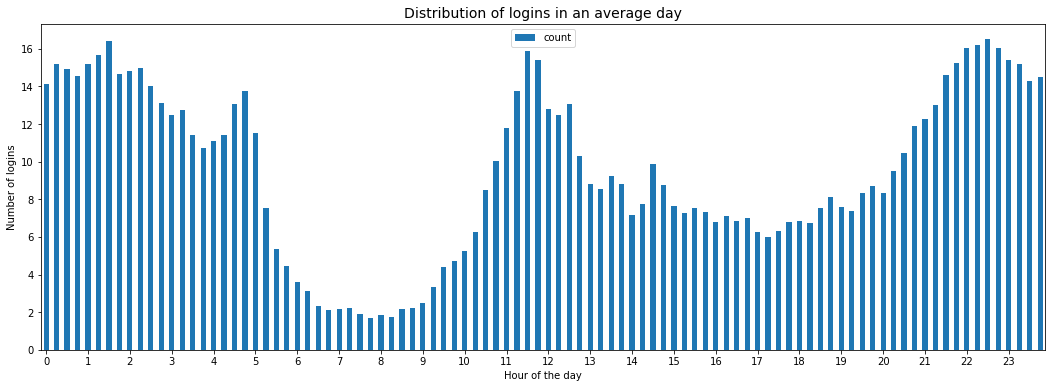

In [16]:
# Plots the result

avg_day.plot(kind='bar', figsize=(18,6))
plt.title('Distribution of logins in an average day', fontsize=14)
plt.ylabel('Number of logins')
plt.xlabel('Hour of the day')
plt.xticks(range(0,96,4), range(0,24), rotation=0)
plt.show()

We can see peaks of demand around 1:30am, 11:45am, and 10:30pm. Also we find a minimum at 7:45am 